In [2]:
import pandas as pd

# Завантаження даних
data = pd.read_csv('Housing.csv')

# Виведення перших 5 рядків
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
#Створіть новий датасет, що містить лише вибрані стовпці: 'price', 'area', 'bedrooms', 'bathrooms'.
columns = ['price', 'area', 'bedrooms', 'bathrooms']
data = data[columns]
print(data)

        price  area  bedrooms  bathrooms
0    13300000  7420         4          2
1    12250000  8960         4          4
2    12250000  9960         3          2
3    12215000  7500         4          2
4    11410000  7420         4          1
..        ...   ...       ...        ...
540   1820000  3000         2          1
541   1767150  2400         3          1
542   1750000  3620         2          1
543   1750000  2910         3          1
544   1750000  3850         3          1

[545 rows x 4 columns]


In [5]:
#Проведіть попередній аналіз даних, включаючи перевірку наявності відсутніх значень та обробку їх, якщо необхідно.
# Перевірка на наявність відсутніх значень
print(data.isnull().sum())

# Якщо є відсутні значення, замініть їх на середнє значення
data.fillna(data.mean(), inplace=True)


price        0
area         0
bedrooms     0
bathrooms    0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Ініціалізація об'єкта нормалізації
scaler = StandardScaler()

# Нормалізація даних
data[['area', 'bedrooms', 'bathrooms']] = scaler.fit_transform(data[['area', 'bedrooms', 'bathrooms']])


In [14]:
#Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.

from sklearn.model_selection import train_test_split

X = data[['area', 'bedrooms', 'bathrooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(data)


        price      area  bedrooms  bathrooms
0    13300000  1.046726  1.403419   1.421812
1    12250000  1.757010  1.403419   5.405809
2    12250000  2.218232  0.047278   1.421812
3    12215000  1.083624  1.403419   1.421812
4    11410000  1.046726  1.403419  -0.570187
..        ...       ...       ...        ...
540   1820000 -0.991879 -1.308863  -0.570187
541   1767150 -1.268613  0.047278  -0.570187
542   1750000 -0.705921 -1.308863  -0.570187
543   1750000 -1.033389  0.047278  -0.570187
544   1750000 -0.599839  0.047278  -0.570187

[545 rows x 4 columns]


In [15]:
#Побудуйте модель лінійної регресії та навчіть її на навчальних даних.
from sklearn.linear_model import LinearRegression

# Ініціалізація моделі
model = LinearRegression()

# Навчання моделі на навчальних даних
model.fit(X_train, y_train)


LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Прогноз на тестових даних
y_pred = model.predict(X_test)

# Розрахунок RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Розрахунок R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')


RMSE: 1658324.6001036866
R-squared (R2): 0.4559299118872445


In [17]:
#Для підвищення якості моделі застосуйте крос-валідацію та порівняйте результати.
from sklearn.model_selection import cross_val_score

# Виконайте крос-валідацію з обраною кількістю складок (наприклад, 5)
cv_scores = cross_val_score(model, X, y, cv=5)

# Виведіть середнє значення коефіцієнта детермінації (R2) після крос-валідації
print(f'Mean R-squared (R2) after cross-validation: {np.mean(cv_scores)}')


Mean R-squared (R2) after cross-validation: -13.989158180111696


In [18]:
#Побудуйте прогнозовані ціни на будинки для тестового набору даних і виведіть їх.
# Прогнозовані ціни на будинки для тестового набору даних
predicted_prices = model.predict(X_test)
print(predicted_prices)


[6383168.05981192 6230250.35140428 3597885.28090091 4289730.8386382
 3930445.60575177 4883933.33918115 5505773.16533075 6068793.48103629
 3321512.02483442 3495157.72744705 8731338.12527606 3561265.8244721
 3487335.97847431 3633344.35548029 3933900.2714526  6661080.95290716
 2893133.47793136 4635197.40872131 4583377.42320885 4274999.75826381
 4296640.17003986 4920207.32903988 3462807.85199841 3875170.95453847
 5412497.19140831 7425564.68389184 3269692.03932195 5021117.35611339
 7122556.71331971 3238600.04801448 5366583.9261965  3640253.68688195
 6057517.06636272 4847659.34932243 4572198.51082701 5573863.86824637
 4167435.67282878 4021179.33154445 3764621.65211187 5307730.62714319
 5319221.21748587 3456243.98716683 6202613.02579763 4013357.58257171
 4534099.68582614 4235271.10270425 6057517.06636272 4525560.52386579
 4983206.22693418 3238600.04801448 6567080.25723531 3238600.04801448
 4886475.58731091 4116997.55359665 4180093.95378268 3567705.7071645
 5971150.42384194 3391517.75642212 51

In [19]:
# Додайте стовпець з одиницями для зміщення в матрицю X
X_train['bias'] = 1

# Перетворіть дані у масиви NumPy
X = X_train.values
y = y_train.values

# Знайдіть коефіцієнти лінійної регресії аналітично
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

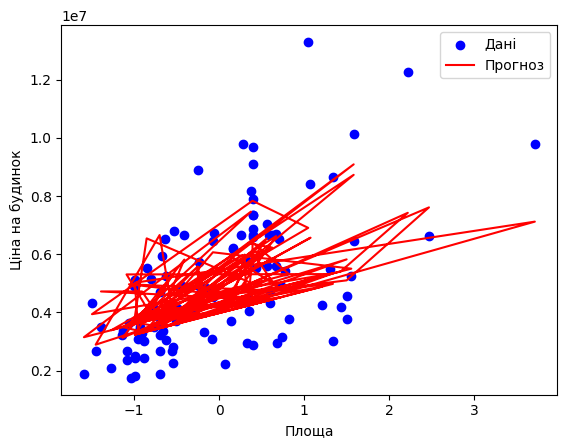

Коефіцієнти лінійної регресії (аналітичні):
Коефіцієнт для 'area': 749023.051426511
Коефіцієнт для 'bedrooms': 265604.85843733686
Коефіцієнт для 'bathrooms': 714016.4484774787
Коефіцієнт для зміщення (bias): 4736303.161529643


In [20]:
#Частина 3: Візуалізація результатів та порівняння
import matplotlib.pyplot as plt

# Візуалізація реальних даних
plt.scatter(X_test['area'], y_test, label='Дані', color='blue')

# Візуалізація прогнозованих значень
predicted_prices_analytical = X_test['area'] * coefficients[0] + X_test['bedrooms'] * coefficients[1] + X_test['bathrooms'] * coefficients[2] + coefficients[3]
plt.plot(X_test['area'], predicted_prices_analytical, label='Прогноз', color='red')

plt.xlabel('Площа')
plt.ylabel('Ціна на будинок')
plt.legend()
plt.show()

# Вивід коефіцієнтів лінійної регресії аналітично
print("Коефіцієнти лінійної регресії (аналітичні):")
print("Коефіцієнт для 'area':", coefficients[0])
print("Коефіцієнт для 'bedrooms':", coefficients[1])
print("Коефіцієнт для 'bathrooms':", coefficients[2])
print("Коефіцієнт для зміщення (bias):", coefficients[3])
